In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import requests
from requests.structures import CaseInsensitiveDict
pd.set_option('max_colwidth', 400)

In [3]:
# Load property data from CSV
property_df = pd.read_csv("Resources/property_data_sales.csv")

In [4]:
property_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8880 entries, 0 to 8879
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   city                   8880 non-null   object 
 1   state                  8880 non-null   object 
 2   zipcode                8880 non-null   int64  
 3   address                8880 non-null   object 
 4   price                  8880 non-null   float64
 5   bedrooms               8880 non-null   int64  
 6   bathrooms              8880 non-null   float64
 7   square_foot            8880 non-null   float64
 8   latitude               8880 non-null   float64
 9   longitude              8880 non-null   float64
 10  sale_amount            8880 non-null   float64
 11  sale_transaction_date  8880 non-null   object 
dtypes: float64(6), int64(2), object(4)
memory usage: 832.6+ KB


In [5]:
property_df.head()

,city,state,zipcode,address,price,bedrooms,bathrooms,square_foot,latitude,longitude,sale_amount,sale_transaction_date
0,CEDAR PARK,TX,78613,2704 ORSOBELLO PL,827510.0,4,3.0,3715.0,30.463011,-97.846630,503723.0,2020-01-30
1,CEDAR PARK,TX,78613,2705 QUIET MOON TRL,1064554.0,5,4.0,5018.0,30.473855,-97.853806,1100000.0,2022-03-25
2,CEDAR PARK,TX,78613,3204 APPENNINI WAY,956365.0,4,3.0,4145.0,30.456254,-97.849748,679630.0,2020-09-10
3,CEDAR PARK,TX,78613,3125 FIORELLINO PL,776845.0,4,3.0,3624.0,30.454730,-97.848842,609375.0,2023-01-04
4,CEDAR PARK,TX,78613,2316 ALDWORTH DR,945000.0,6,4.0,4725.0,30.467167,-97.851148,781250.0,2021-12-13


In [8]:
# Add new column for property_id
property_df['property_id'] = range(1, len(property_df) + 1)

# Reorder columns
property_df = property_df[['property_id', 'city', 'state', 'zipcode', 'address', 'price', 'bedrooms', 'bathrooms', 'square_foot', 'latitude', 'longitude', 'sale_amount', 'sale_transaction_date']]
property_df.head()

,property_id,city,state,zipcode,address,price,bedrooms,bathrooms,square_foot,latitude,longitude,sale_amount,sale_transaction_date
0,1,CEDAR PARK,TX,78613,2704 ORSOBELLO PL,827510.0,4,3.0,3715.0,30.463011,-97.846630,503723.0,2020-01-30
1,2,CEDAR PARK,TX,78613,2705 QUIET MOON TRL,1064554.0,5,4.0,5018.0,30.473855,-97.853806,1100000.0,2022-03-25
2,3,CEDAR PARK,TX,78613,3204 APPENNINI WAY,956365.0,4,3.0,4145.0,30.456254,-97.849748,679630.0,2020-09-10
3,4,CEDAR PARK,TX,78613,3125 FIORELLINO PL,776845.0,4,3.0,3624.0,30.454730,-97.848842,609375.0,2023-01-04
4,5,CEDAR PARK,TX,78613,2316 ALDWORTH DR,945000.0,6,4.0,4725.0,30.467167,-97.851148,781250.0,2021-12-13


In [7]:
# Export df as CSV file
property_df.to_csv("Resources/property.csv", index=False)

# What is the average property price in Austin, Texas?

In [11]:
# Calculate the average property price
average_price_austin = property_df['price'].mean()

print(f"The average property price in Austin, Texas is: ${average_price_austin:.2f}")

The average property price in Austin, Texas is: $959958.56


# Are there specific zipcodes within Austin with higher property prices?

In [14]:
# Group by zipcode
zipcode_prices = property_df.groupby('zipcode')['price'].mean().sort_values(ascending=False)

# Print the top zipcodes with higher property prices
print("Top Zipcodes in Austin with Higher Property Prices:")
print(zipcode_prices.head(10))

Top Zipcodes in Austin with Higher Property Prices:
zipcode
78735    2.169895e+06
78703    2.113515e+06
78704    1.844878e+06
78733    1.794601e+06
78731    1.467423e+06
78732    1.267937e+06
78738    1.261768e+06
78756    1.169535e+06
78757    1.082824e+06
78734    1.059674e+06
Name: price, dtype: float64


# Distribution of property prices within these zip codes

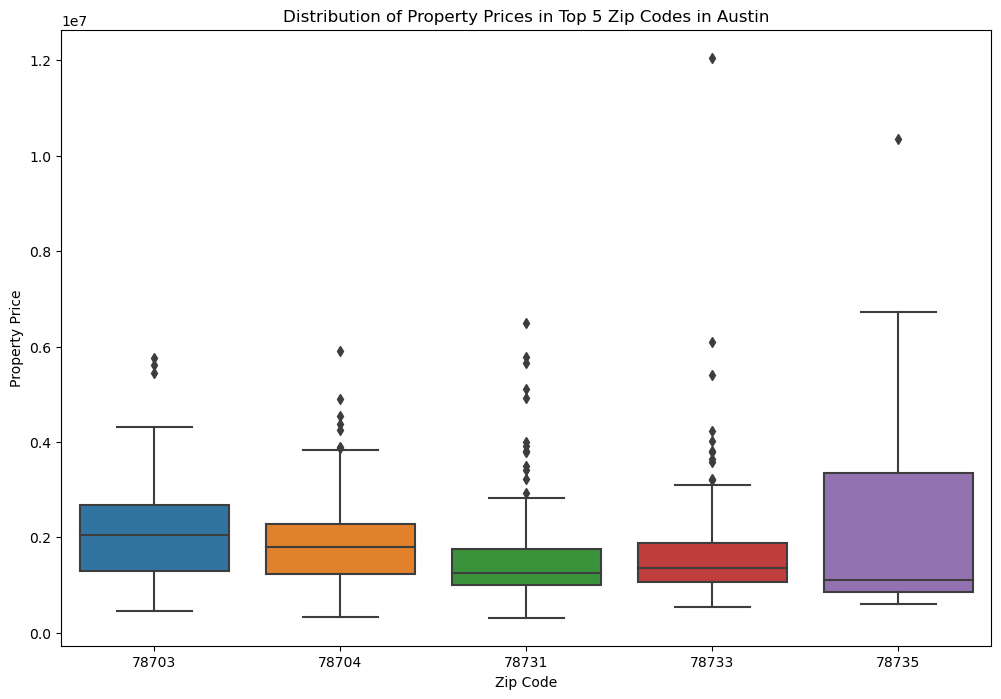

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by zipcode
zipcode_prices = property_df.groupby('zipcode')['price'].mean().sort_values(ascending=False)

# Filter the data for the top 5 zip codes
top_zipcodes = zipcode_prices.head(5).index
filtered_df = property_df[property_df['zipcode'].isin(top_zipcodes)]

# Create a boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='zipcode', y='price', data=filtered_df)
plt.title('Distribution of Property Prices in Top 5 Zip Codes in Austin')
plt.xlabel('Zip Code')
plt.ylabel('Property Price')
plt.show()

In [16]:
filtered_df.describe()

,property_id,zipcode,price,bedrooms,bathrooms,square_foot,latitude,longitude,sale_amount
count,1133.000000,1133.000000,1.133000e+03,1133.000000,1133.000000,1133.000000,1133.000000,1133.000000,1.133000e+03
mean,2672.866726,78717.868491,1.827176e+06,3.537511,2.905560,3043.015004,30.291046,-97.785674,1.571203e+06
std,1154.949894,14.431127,1.098987e+06,0.941606,1.113241,1717.066228,0.040197,0.043313,4.218592e+06
min,1295.000000,78703.000000,3.144870e+05,1.000000,1.000000,400.000000,30.226170,-97.921292,3.063000e+03
25%,1578.000000,78704.000000,1.051429e+06,3.000000,2.000000,1927.000000,30.251785,-97.784253,6.853130e+05
50%,1861.000000,78704.000000,1.585151e+06,4.000000,3.000000,2769.000000,30.293344,-97.768131,1.187500e+06
75%,3541.000000,78731.000000,2.249209e+06,4.000000,4.000000,3751.000000,30.323972,-97.758068,1.875000e+06
max,4594.000000,78735.000000,1.205353e+07,7.000000,10.000000,20841.000000,30.376329,-97.736556,1.373719e+08


# Analysis 

Based on the characteristics of the boxplot, here are some potential conclusions about the top 5 zip codes in Austin:

## Concentration of Property Prices
- The narrow boxes suggest that the majority of properties within the top 5 zip codes have similar price ranges. This could indicate a certain level of homogeneity in the local real estate markets.

## Presence of Luxury Properties
- The presence of outliers above the boxes, extending to the top of the plot, indicates the existence of luxury or high-end properties within these zip codes. These outliers could be driving the overall average property prices higher.

## Potential for High-Value Investments
- Investors and homebuyers in these zip codes might find a mix of more affordable properties, as well as opportunities for high-value investments in luxury real estate.

# Relationship between square footage and property prices in Austin

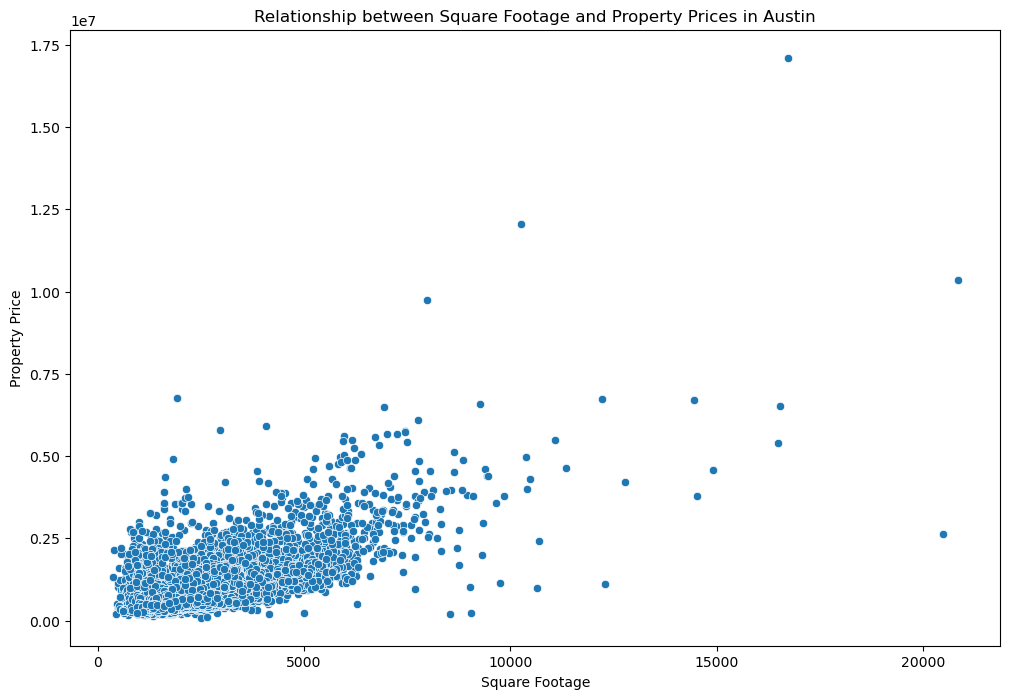

Correlation Coefficient: 0.5964861404887533
Average Cost per Square Foot: $372.85


In [17]:
# Create a scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='square_foot', y='price', data=property_df)
plt.title('Relationship between Square Footage and Property Prices in Austin')
plt.xlabel('Square Footage')
plt.ylabel('Property Price')
plt.show()

# Calculate the correlation coefficient
correlation = property_df['square_foot'].corr(property_df['price'])
print(f"Correlation Coefficient: {correlation}")

# Calculate the cost per square foot
property_df['cost_per_square_foot'] = property_df['price'] / property_df['square_foot']
average_cost_per_square_foot = property_df['cost_per_square_foot'].mean()
print(f"Average Cost per Square Foot: ${average_cost_per_square_foot:.2f}")

# Analysis 

## Moderate Positive Correlation
- The correlation coefficient of 0.5965 indicates a moderate positive correlation between square footage and property prices. As square footage increases, property prices tend to increase, suggesting that larger properties generally command higher prices.

## Significant Variability
- While there is a positive correlation, the moderate strength of the correlation also implies that other factors beyond square footage contribute to property prices. There is considerable variability in prices that cannot be explained by square footage alone.

## Average Cost per Square Foot
- The average cost per square foot of $372.85 provides a measure of the average price associated with each unit of square footage. This metric can be useful for buyers, sellers, and real estate professionals to gauge property values.

## Consideration for Buyers
- For potential buyers, understanding the cost per square foot can help in evaluating the value of a property in relation to its size. It allows for a more standardized comparison of properties of different sizes.

# How has the median property price in Austin changed over time?

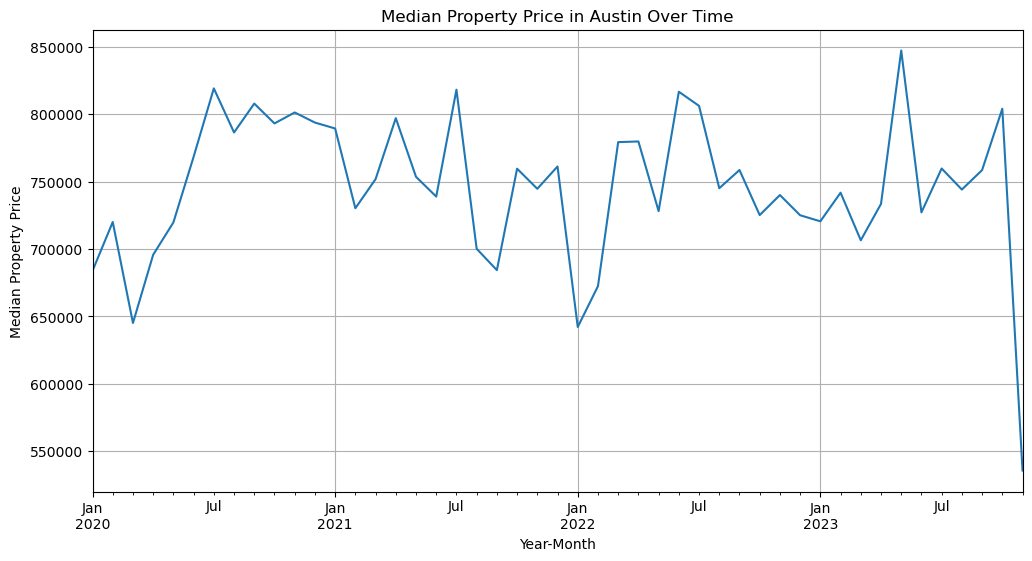

In [19]:
# Convert 'sale_transaction_date' to datetime
property_df['sale_transaction_date'] = pd.to_datetime(property_df['sale_transaction_date'])

# Set 'sale_transaction_date' as the index
property_df.set_index('sale_transaction_date', inplace=True)

# Group the data by month and calculate the median property price
median_price_over_time = property_df['price'].resample('M').median()

# Create plot
plt.figure(figsize=(12, 6))
median_price_over_time.plot()
plt.title('Median Property Price in Austin Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Median Property Price')
plt.grid(True)
plt.show()

# Analysis 

## Overall Upward Trend
- The general trend suggests an overall increase in the median property prices in Austin from January 2020 to the present. This indicates a positive trajectory in the real estate market.

## Impact of External Events
- Significant events or changes in the real estate landscape may have influenced the spikes and dips. For example, the spike in July 2020 could be attributed to a surge in demand or other market dynamics.

## Resilience After Dips 
- The graph shows that after notable dips in January 2021 and January 2022, the median property prices quickly rebounded. This resilience could be a positive indicator of the market's ability to recover from temporary downturns.

## Seasonal Patterns
- Seasonal patterns may contribute to the observed fluctuations, as certain times of the year might experience increased or decreased real estate activity.